<a href="https://colab.research.google.com/github/Hyrysake/My_Data_Science/blob/main/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import optimizers
from keras import losses
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers

import matplotlib.pyplot as plt

In [2]:
(train_data, train_targets), (test_data, test_targets) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print("Розмір данних для:", train_data.shape)
print("Розмір данних для:", test_data.shape)

Розмір данних для: (60000, 28, 28)
Розмір данних для: (10000, 28, 28)


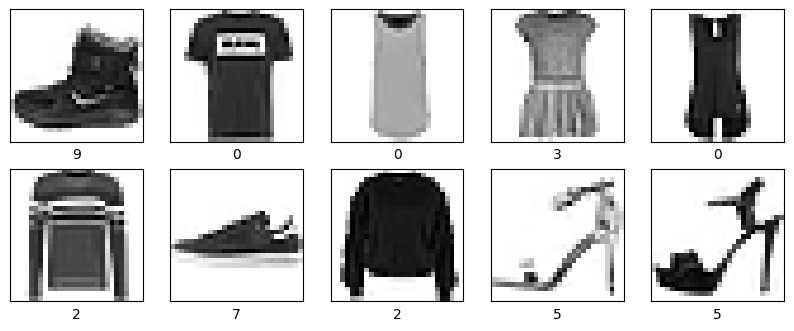

In [4]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(train_targets[i])
plt.show()

In [5]:
unique_targets = np.unique(train_targets)
print("Унікальні мітки в train_targets:", unique_targets)

Унікальні мітки в train_targets: [0 1 2 3 4 5 6 7 8 9]


In [6]:
#аналіз унікальних міток показав що їх 10
number_of_classes = 10

#швидкість навчання
lr = 0.01

# Розмір данних для навчання: (60000, 28, 28)
# 28 означає розмір пікселів картинки, отже кількість атрибутів = 28 * 28 = 784
number_of_attributes = 784

# кількість нейронів
first_layer = 68
second_layer = 68
third_layer = 64

#кількість епох
number_of_epochs = 25

# batch_size
batch_size = 128

activation='relu'

In [7]:
x_train = np.array(train_data, dtype=np.float32)
x_test = np.array(test_data, dtype=np.float32)

x_train = x_train.reshape([-1, number_of_attributes]) #вектор 28*28 елементів
x_test = x_test.reshape([-1, number_of_attributes]) #вектор 28*28 елементів

# у зображеннях, що зберігаються у форматі PNG або JPEG, значення пікселів можуть перебувати в діапазоні від 0 до 255
# тому для нормалізації використовуємо 255
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np.asarray(train_targets, dtype=np.float32)
y_test = np.asarray(test_targets, dtype=np.float32)

y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

In [8]:
def train_model(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train):
    # Модель
    model = Sequential()
    model.add(Dense(first_layer, activation = activation, input_shape=(number_of_attributes,)))
    model.add(Dense(number_of_classes, activation='softmax'))

    # Компіляція моделі
    optimizer = optimizers.RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=losses.categorical_crossentropy,
                  metrics=['accuracy'])

    # Розбивка даних на навчальний та тестовий набори
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # Навчання моделі
    history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Візуалізація історії навчання
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Візуалізація втрат
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'r-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'g--', label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Візуалазація точності
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'r-', label='Training accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'g--', label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Epoch 1/25
375/375 [==============================] - 2s 4ms/step - loss: 0.6953 - accuracy: 0.7613 - val_loss: 0.5251 - val_accuracy: 0.8057
Epoch 2/25
375/375 [==============================] - 1s 4ms/step - loss: 0.4607 - accuracy: 0.8322 - val_loss: 0.3903 - val_accuracy: 0.8580
Epoch 3/25
375/375 [==============================] - 2s 5ms/step - loss: 0.4224 - accuracy: 0.8472 - val_loss: 0.4097 - val_accuracy: 0.8488
Epoch 4/25
375/375 [==============================] - 2s 5ms/step - loss: 0.3997 - accuracy: 0.8561 - val_loss: 0.3884 - val_accuracy: 0.8593
Epoch 5/25
375/375 [==============================] - 1s 4ms/step - loss: 0.3879 - accuracy: 0.8598 - val_loss: 0.4139 - val_accuracy: 0.8533
Epoch 6/25
375/375 [==============================] - 1s 4ms/step - loss: 0.3765 - accuracy: 0.8623 - val_loss: 0.4564 - val_accuracy: 0.8364
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.3671 - accuracy: 0.8668 - val_loss: 0.3951 - val_accuracy: 0.8652
Epoch 

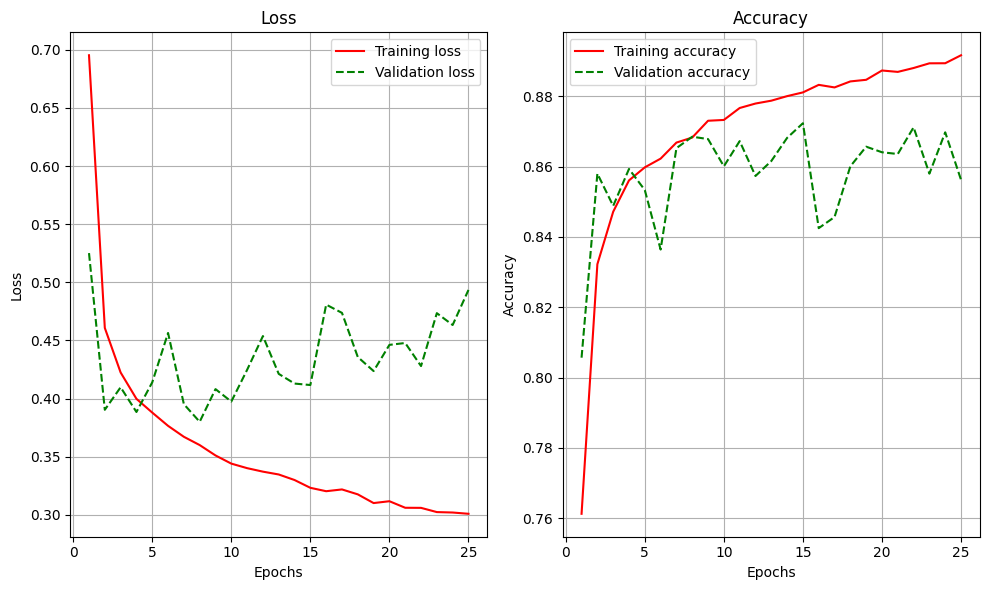

In [9]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train)

Висновок до першого тесту: У цьому сценарії точність на валідаційному наборі даних становить приблизно 88.87%. Це задовільний показник, але не досягає мінімально запланованого рівня в 91%.

In [10]:
def train_model_two(number_of_attributes, number_of_classes, first_layer, second_layer, third_layer, lr, number_of_epochs, batch_size, x_train, y_train):
    # Модель
    model = Sequential()
    model.add(Dense(first_layer, activation=activation, input_shape=(number_of_attributes,)))
    model.add(Dense(second_layer, activation=activation))
    model.add(Dense(third_layer, activation=activation))
    model.add(Dense(number_of_classes, activation='softmax'))

    # Компіляція моделі
    optimizer = optimizers.RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=losses.categorical_crossentropy,
                  metrics=['accuracy'])

    # Розбивка даних на навчальний та тестовий набори
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # Навчання модели
    history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Візуалізація історії навчання
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Візуалізація втрат
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'r-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'g--', label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Візуалізація точності
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'r-', label='Training accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'g--', label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Epoch 1/25
375/375 [==============================] - 5s 8ms/step - loss: 0.8083 - accuracy: 0.7195 - val_loss: 0.5304 - val_accuracy: 0.8212
Epoch 2/25
375/375 [==============================] - 1s 4ms/step - loss: 0.5055 - accuracy: 0.8172 - val_loss: 0.4839 - val_accuracy: 0.8303
Epoch 3/25
375/375 [==============================] - 1s 4ms/step - loss: 0.4603 - accuracy: 0.8353 - val_loss: 0.4975 - val_accuracy: 0.8271
Epoch 4/25
375/375 [==============================] - 2s 6ms/step - loss: 0.4451 - accuracy: 0.8429 - val_loss: 0.4668 - val_accuracy: 0.8438
Epoch 5/25
375/375 [==============================] - 2s 5ms/step - loss: 0.4332 - accuracy: 0.8452 - val_loss: 0.4422 - val_accuracy: 0.8514
Epoch 6/25
375/375 [==============================] - 1s 4ms/step - loss: 0.4232 - accuracy: 0.8500 - val_loss: 0.4317 - val_accuracy: 0.8468
Epoch 7/25
375/375 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.8562 - val_loss: 0.4257 - val_accuracy: 0.8526
Epoch 

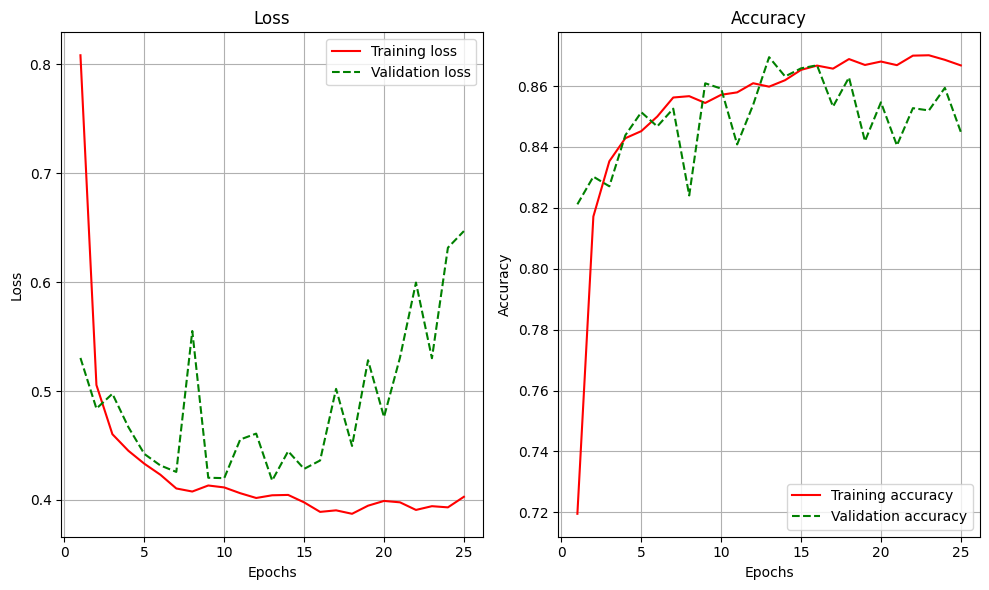

In [11]:
train_model_two(number_of_attributes, number_of_classes, first_layer, second_layer, third_layer, lr, number_of_epochs, batch_size, x_train, y_train)

Висновок після другого тесту: Модифікація кількості шарів не привела до поліпшення. У цьому випадку точність на валідаційному наборі даних становить близько 86.46%. Хоча це задовільний результат, проте він не досягає мінімально запланованого показника в 91%.

Epoch 1/25
375/375 [==============================] - 3s 7ms/step - loss: 0.7859 - accuracy: 0.7571 - val_loss: 0.5238 - val_accuracy: 0.8251
Epoch 2/25
375/375 [==============================] - 2s 6ms/step - loss: 0.4589 - accuracy: 0.8349 - val_loss: 0.4449 - val_accuracy: 0.8455
Epoch 3/25
375/375 [==============================] - 2s 6ms/step - loss: 0.4111 - accuracy: 0.8530 - val_loss: 0.4483 - val_accuracy: 0.8501
Epoch 4/25
375/375 [==============================] - 2s 6ms/step - loss: 0.3914 - accuracy: 0.8603 - val_loss: 0.3803 - val_accuracy: 0.8700
Epoch 5/25
375/375 [==============================] - 3s 7ms/step - loss: 0.3741 - accuracy: 0.8669 - val_loss: 0.4671 - val_accuracy: 0.8404
Epoch 6/25
375/375 [==============================] - 3s 8ms/step - loss: 0.3616 - accuracy: 0.8724 - val_loss: 0.4438 - val_accuracy: 0.8509
Epoch 7/25
375/375 [==============================] - 2s 6ms/step - loss: 0.3504 - accuracy: 0.8765 - val_loss: 0.4354 - val_accuracy: 0.8567
Epoch 

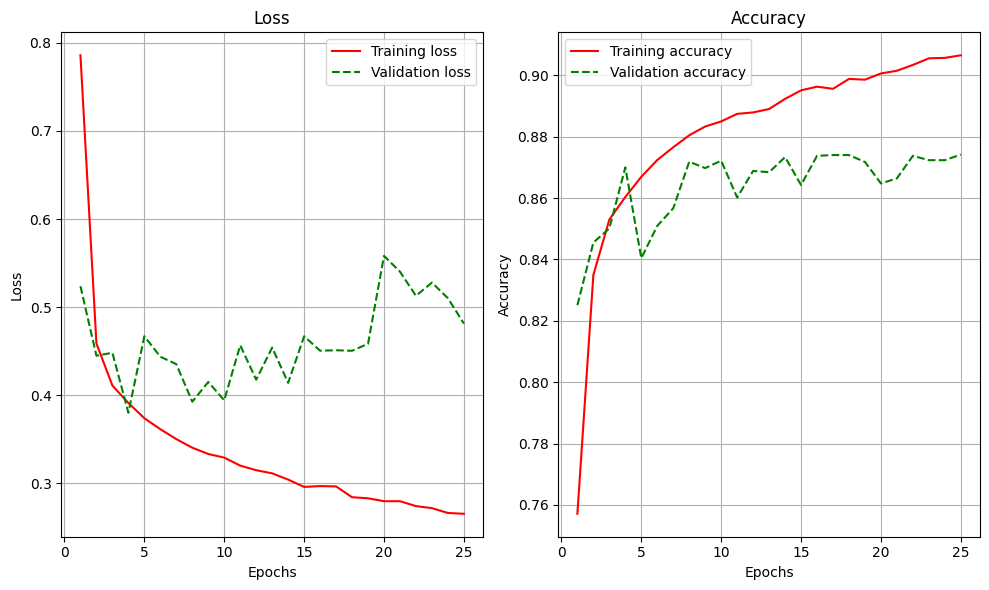

In [12]:
train_model(number_of_attributes, number_of_classes, 256, lr, number_of_epochs, batch_size, x_train, y_train)

Висновок після третього тесту: При зміні кількості нейронів точність на валідаційному наборі даних становить близько 90,56%. Хоча це добрий результат, проте він не досягає мінімально запланованого рівня в 91%.

In [13]:
activation='leaky_relu'

Epoch 1/25
375/375 [==============================] - 3s 6ms/step - loss: 0.8356 - accuracy: 0.7397 - val_loss: 0.7842 - val_accuracy: 0.7473
Epoch 2/25
375/375 [==============================] - 1s 4ms/step - loss: 0.5318 - accuracy: 0.8111 - val_loss: 0.5250 - val_accuracy: 0.8023
Epoch 3/25
375/375 [==============================] - 1s 4ms/step - loss: 0.4813 - accuracy: 0.8279 - val_loss: 0.3871 - val_accuracy: 0.8584
Epoch 4/25
375/375 [==============================] - 1s 4ms/step - loss: 0.4618 - accuracy: 0.8362 - val_loss: 0.4074 - val_accuracy: 0.8537
Epoch 5/25
375/375 [==============================] - 1s 4ms/step - loss: 0.4389 - accuracy: 0.8446 - val_loss: 0.4913 - val_accuracy: 0.8190
Epoch 6/25
375/375 [==============================] - 1s 4ms/step - loss: 0.4266 - accuracy: 0.8477 - val_loss: 0.5839 - val_accuracy: 0.7968
Epoch 7/25
375/375 [==============================] - 1s 4ms/step - loss: 0.4186 - accuracy: 0.8501 - val_loss: 0.3860 - val_accuracy: 0.8660
Epoch 

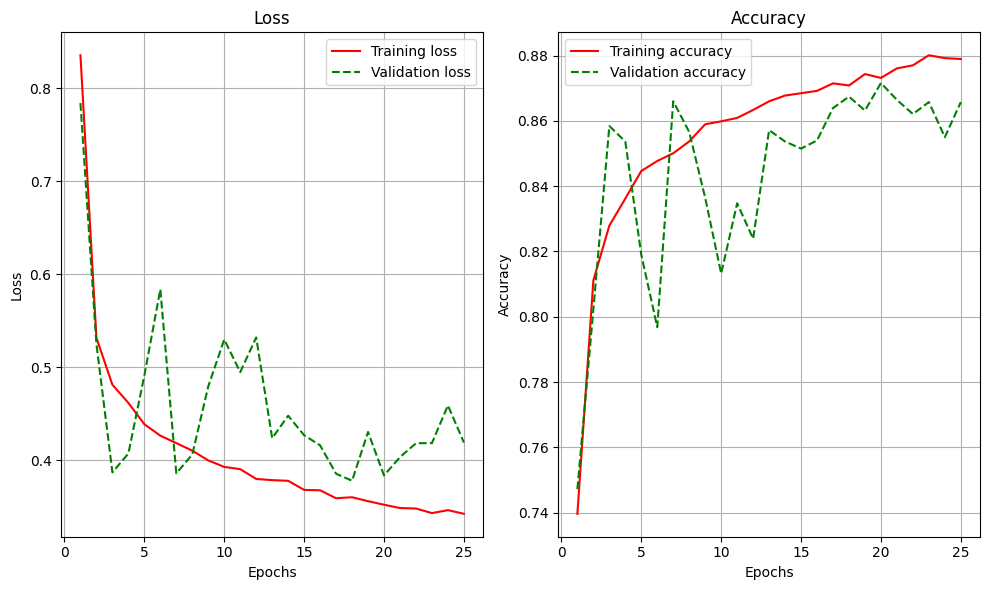

In [14]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train)

In [15]:
activation='elu'

Epoch 1/25
375/375 [==============================] - 3s 7ms/step - loss: 0.7486 - accuracy: 0.7561 - val_loss: 0.7120 - val_accuracy: 0.7444
Epoch 2/25
375/375 [==============================] - 2s 4ms/step - loss: 0.4771 - accuracy: 0.8277 - val_loss: 0.4353 - val_accuracy: 0.8437
Epoch 3/25
375/375 [==============================] - 1s 4ms/step - loss: 0.4322 - accuracy: 0.8442 - val_loss: 0.3872 - val_accuracy: 0.8597
Epoch 4/25
375/375 [==============================] - 1s 4ms/step - loss: 0.3977 - accuracy: 0.8547 - val_loss: 0.4269 - val_accuracy: 0.8462
Epoch 5/25
375/375 [==============================] - 1s 4ms/step - loss: 0.3792 - accuracy: 0.8626 - val_loss: 0.3708 - val_accuracy: 0.8646
Epoch 6/25
375/375 [==============================] - 2s 4ms/step - loss: 0.3638 - accuracy: 0.8674 - val_loss: 0.3595 - val_accuracy: 0.8742
Epoch 7/25
375/375 [==============================] - 2s 4ms/step - loss: 0.3535 - accuracy: 0.8721 - val_loss: 0.5071 - val_accuracy: 0.8241
Epoch 

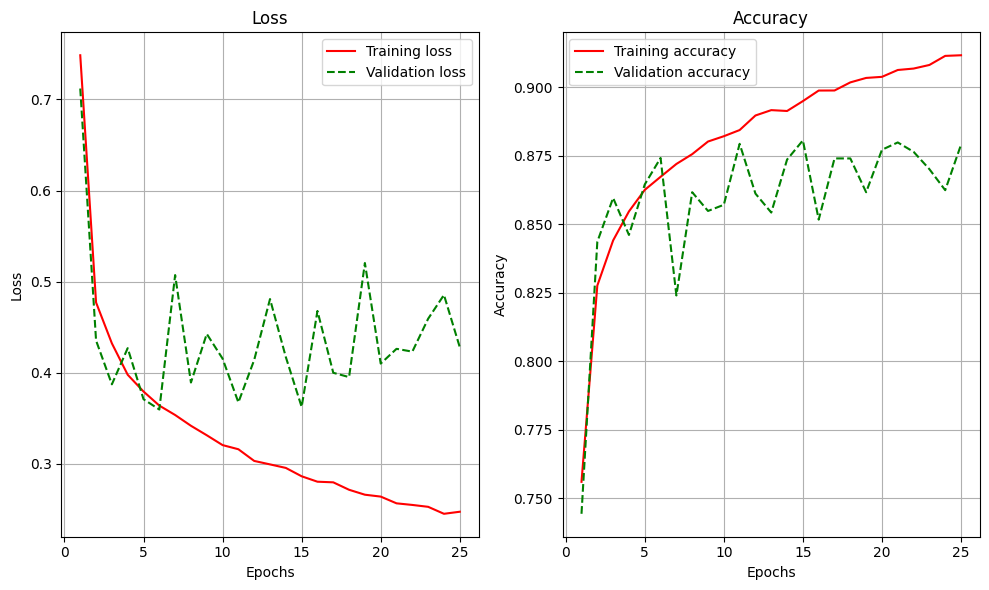

In [16]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train)

Elu показала гарний результат і підвищила точність нашої моделі, вона становить 91,3%

Epoch 1/35
375/375 [==============================] - 2s 4ms/step - loss: 0.8302 - accuracy: 0.7490 - val_loss: 0.4773 - val_accuracy: 0.8163
Epoch 2/35
375/375 [==============================] - 2s 4ms/step - loss: 0.4788 - accuracy: 0.8249 - val_loss: 0.4213 - val_accuracy: 0.8480
Epoch 3/35
375/375 [==============================] - 2s 5ms/step - loss: 0.4291 - accuracy: 0.8453 - val_loss: 0.4101 - val_accuracy: 0.8553
Epoch 4/35
375/375 [==============================] - 2s 5ms/step - loss: 0.3960 - accuracy: 0.8574 - val_loss: 0.4314 - val_accuracy: 0.8522
Epoch 5/35
375/375 [==============================] - 2s 4ms/step - loss: 0.3770 - accuracy: 0.8639 - val_loss: 0.3860 - val_accuracy: 0.8612
Epoch 6/35
375/375 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8701 - val_loss: 0.3942 - val_accuracy: 0.8587
Epoch 7/35
375/375 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.8745 - val_loss: 0.4187 - val_accuracy: 0.8557
Epoch 

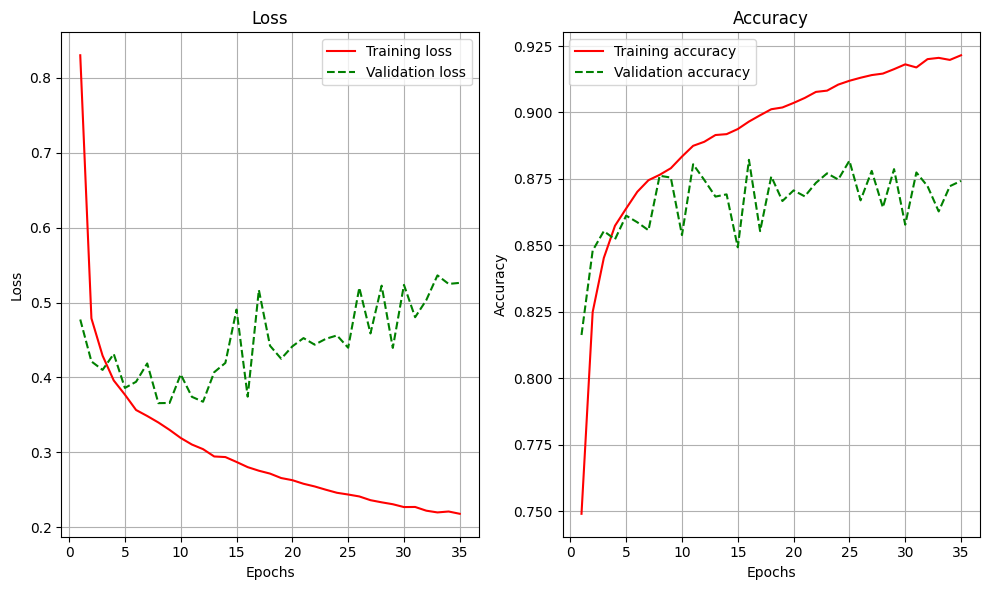

In [17]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, 35, batch_size, x_train, y_train)

Висновок: збільшення кількості епох до 35 покаращила точність моделі до 92,47%Висновок: збільшення кількості епох до 35 покаращила точність моделі до 92,47%

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 0.7861 - accuracy: 0.7487 - val_loss: 0.5450 - val_accuracy: 0.8012
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4805 - accuracy: 0.8248 - val_loss: 0.4174 - val_accuracy: 0.8429
Epoch 3/50
375/375 [==============================] - 1s 4ms/step - loss: 0.4243 - accuracy: 0.8459 - val_loss: 0.4388 - val_accuracy: 0.8472
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3989 - accuracy: 0.8559 - val_loss: 0.4186 - val_accuracy: 0.8460
Epoch 5/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3761 - accuracy: 0.8643 - val_loss: 0.4102 - val_accuracy: 0.8593
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3551 - accuracy: 0.8696 - val_loss: 0.4341 - val_accuracy: 0.8468
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3477 - accuracy: 0.8741 - val_loss: 0.4308 - val_accuracy: 0.8593
Epoch 

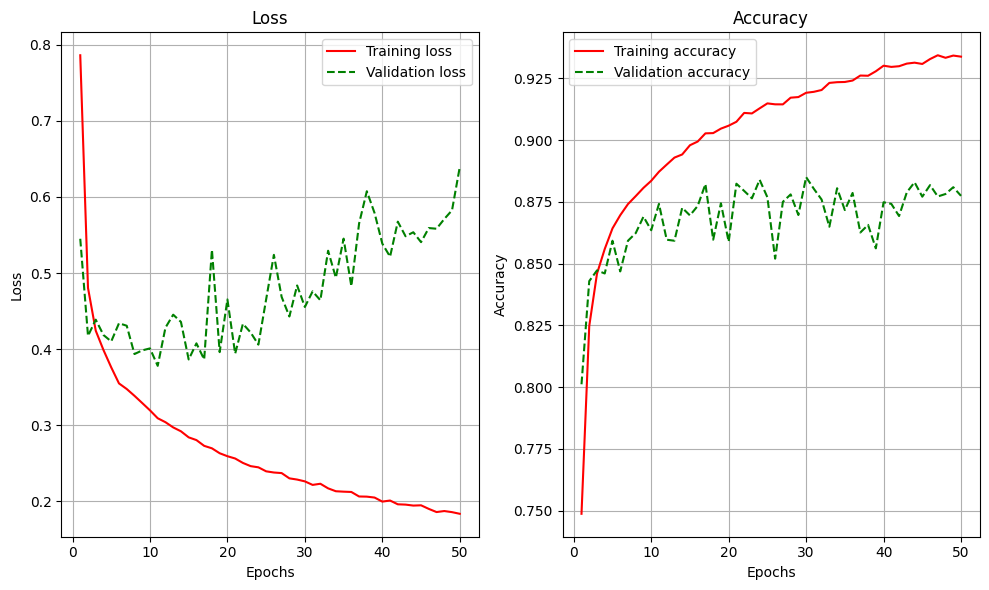

In [18]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, 50, batch_size, x_train, y_train)

Збільшення кількості епох до 50 покаращила точність моделі до 93,27%

Epoch 1/50
320/320 [==============================] - 2s 6ms/step - loss: 0.8765 - accuracy: 0.7372 - val_loss: 0.4506 - val_accuracy: 0.8305
Epoch 2/50
320/320 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.8235 - val_loss: 0.4168 - val_accuracy: 0.8458
Epoch 3/50
320/320 [==============================] - 1s 3ms/step - loss: 0.4313 - accuracy: 0.8414 - val_loss: 0.4539 - val_accuracy: 0.8403
Epoch 4/50
320/320 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8549 - val_loss: 0.3950 - val_accuracy: 0.8577
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 0.3749 - accuracy: 0.8625 - val_loss: 0.3828 - val_accuracy: 0.8584
Epoch 6/50
320/320 [==============================] - 1s 3ms/step - loss: 0.3617 - accuracy: 0.8685 - val_loss: 0.4185 - val_accuracy: 0.8409
Epoch 7/50
320/320 [==============================] - 1s 3ms/step - loss: 0.3477 - accuracy: 0.8725 - val_loss: 0.4009 - val_accuracy: 0.8540
Epoch 

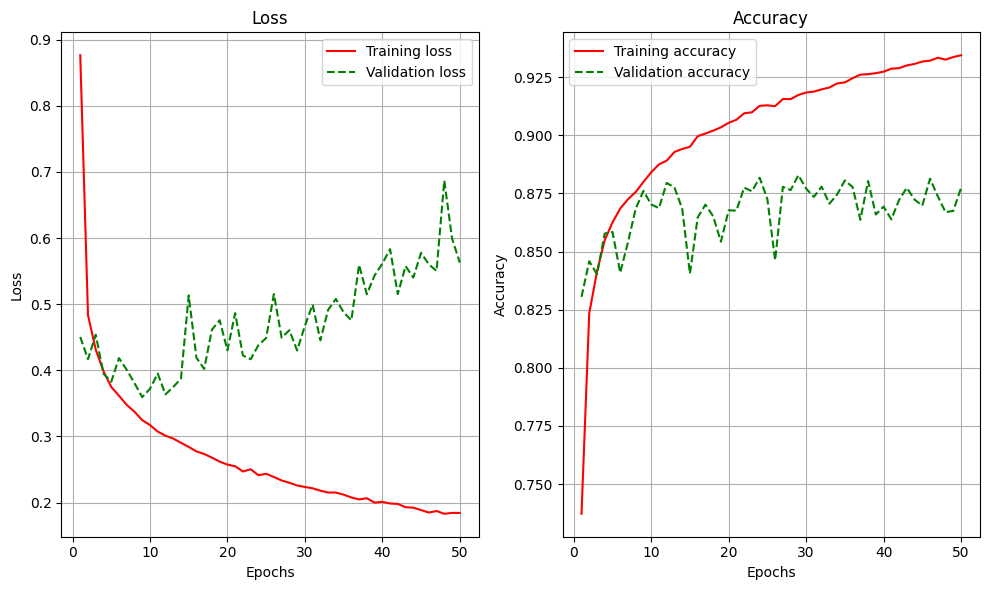

In [19]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, 50, 150, x_train, y_train)

Збільшення кількості батчів до 150 незначно покаращила точність моделі до 93,41%

In [20]:
def train_model_three(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train):
    # Модель
    model = Sequential()
    model.add(Dense(first_layer, activation = activation, input_shape=(number_of_attributes,)))
    model.add(Dense(number_of_classes, activation='softmax'))

    # Компіляція моделі
    optimizer = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=losses.categorical_crossentropy,
                  metrics=['accuracy'])

    # Розбивка даних на навчальний та тестовий набори
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # Навчання моделі
    history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Візуалізація історії навчання
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Візуалізація втрат
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'r-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'g--', label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Візуалазація точності
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'r-', label='Training accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'g--', label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Epoch 1/50
320/320 [==============================] - 2s 4ms/step - loss: 0.5643 - accuracy: 0.8024 - val_loss: 0.4360 - val_accuracy: 0.8393
Epoch 2/50
320/320 [==============================] - 1s 3ms/step - loss: 0.4059 - accuracy: 0.8529 - val_loss: 0.4201 - val_accuracy: 0.8527
Epoch 3/50
320/320 [==============================] - 1s 3ms/step - loss: 0.3728 - accuracy: 0.8640 - val_loss: 0.3742 - val_accuracy: 0.8583
Epoch 4/50
320/320 [==============================] - 1s 4ms/step - loss: 0.3521 - accuracy: 0.8719 - val_loss: 0.3742 - val_accuracy: 0.8602
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8771 - val_loss: 0.3591 - val_accuracy: 0.8682
Epoch 6/50
320/320 [==============================] - 2s 6ms/step - loss: 0.3198 - accuracy: 0.8815 - val_loss: 0.3690 - val_accuracy: 0.8652
Epoch 7/50
320/320 [==============================] - 2s 6ms/step - loss: 0.3092 - accuracy: 0.8864 - val_loss: 0.3410 - val_accuracy: 0.8785
Epoch 

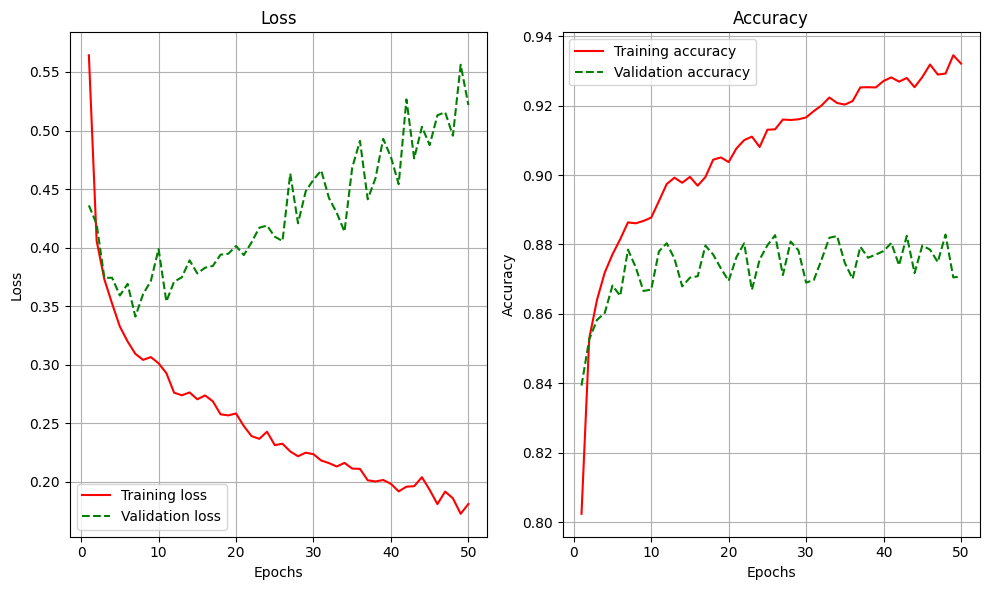

In [21]:
train_model_three(number_of_attributes, number_of_classes, first_layer, lr, 50, 150, x_train, y_train)

Зміна вибору оптимізатору на Адам трохи погіршила результат точності моделі, який тепер становить 93,12%

In [22]:
def train_model_four(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train):
    # Модель
    model = Sequential()
    model.add(Dense(first_layer,
                    activation = activation,
                    input_shape=(number_of_attributes,),
                    kernel_regularizer=regularizers.l2(0.01),
                    bias_regularizer=regularizers.l2(0.01)))
    model.add(Dense(number_of_classes, activation='softmax'))

    # Компіляція моделі
    optimizer = optimizers.RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=losses.categorical_crossentropy,
                  metrics=['accuracy'])

    # Розбивка даних на навчальний та тестовий набори
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # Навчання моделі
    history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Візуалізація історії навчання
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Візуалізація втрат
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'r-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'g--', label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Візуалазація точності
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'r-', label='Training accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'g--', label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Epoch 1/25
375/375 [==============================] - 5s 12ms/step - loss: 1.4611 - accuracy: 0.6325 - val_loss: 0.9490 - val_accuracy: 0.7389
Epoch 2/25
375/375 [==============================] - 2s 6ms/step - loss: 1.1151 - accuracy: 0.6885 - val_loss: 0.8788 - val_accuracy: 0.7514
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 1.0853 - accuracy: 0.6878 - val_loss: 1.2333 - val_accuracy: 0.6428
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 1.0650 - accuracy: 0.6941 - val_loss: 1.4703 - val_accuracy: 0.5651
Epoch 5/25
375/375 [==============================] - 2s 4ms/step - loss: 1.0692 - accuracy: 0.6967 - val_loss: 0.9283 - val_accuracy: 0.6797
Epoch 6/25
375/375 [==============================] - 2s 4ms/step - loss: 1.0636 - accuracy: 0.7007 - val_loss: 1.2769 - val_accuracy: 0.6633
Epoch 7/25
375/375 [==============================] - 1s 4ms/step - loss: 1.0668 - accuracy: 0.6993 - val_loss: 0.9114 - val_accuracy: 0.7233
Epoch

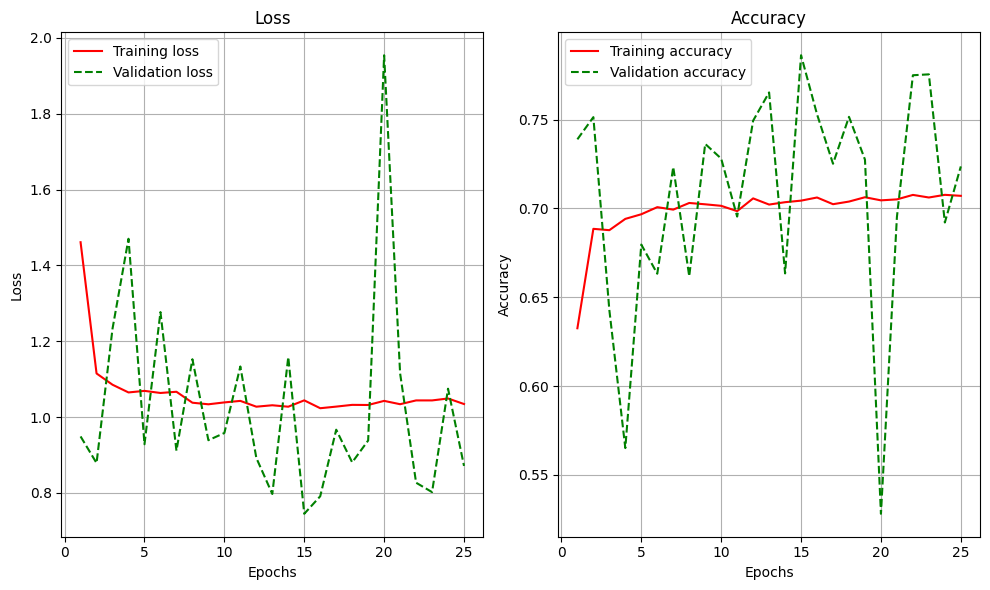

In [23]:
train_model_four(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train)

Зміна техніки регуляризації погіршила результат, тому залишимо попередню.

Загальний висновок: найкраще себе показала модель з наступними гіперпараметрами
* number_of_classes = 10
* lr = 0.01
* number_of_attributes = 784
* first_layer = 68
* number_of_epochs = 50
* batch_size = 150
* activation='relu'